### Iterate over corpus, process PDFs by:
1) remove formatting
2) chunk into paragraphs and sentences


In [1]:
import sys
import os

sys.path.append(os.path.join(os.path.realpath('.'),'..','..','common_functions'))

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


In [3]:
import re
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from sklearn.decomposition import NMF

import spacy
from spacy import displacy

#custom common functions
import parse_pdf

In [14]:
nlp = spacy.load("en_core_web_md")

In [ ]:
# get available evaluation files
corpora_location = os.path.join(os.path.realpath('.'),'..','..','..','corpora','ifrc_evaluations')
pdf_list = [pdf for pdf in os.listdir(corpora_location) if pdf[-4:] == '.pdf']

df_paragraph = pd.DataFrame(columns=['file','paragraph'])

i=0
for pdf in pdf_list:
    print(i)
    filepath = os.path.join(corpora_location,pdf)
    
    try:
        df_paragraph = pd.concat([df_paragraph, parse_pdf.load_pdf_to_df(filepath)], ignore_index=True)
    except:
        pass
    #df_paragraph = df_paragraph.concat(pdf_parser.load_pdf_to_df(filepath), ignore_index=True)
    #document = pdf_parser.read_pdf_document(filepath)
    #df_paragraph = df_paragraph.append(pdf_parser.split_to_paragraphs(document), ignore_index=True)
df_paragraph.to_csv("..\\corpora\\ifrc_evaluations\ifrc_evaluations.csv")

In [4]:
# number of files represented
len(df_paragraph['file'].unique())

401

In [32]:
#df_paragraph['year'] = 
df_paragraph['file'][0:4]

0    ..\corpora\ifrc_evaluations\2003_evaluation_of...
1    ..\corpora\ifrc_evaluations\2003_evaluation_of...
2    ..\corpora\ifrc_evaluations\2003_evaluation_of...
3    ..\corpora\ifrc_evaluations\2003_evaluation_of...
Name: file, dtype: object

In [9]:
#refer to NMF Blueprint page 213-214

tfidf_para_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(df_paragraph['paragraph'])
tfidf_para_vectors.shape

nmf_text_model = NMF(n_components=10, random_state=42)

W_text_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_text_matrix = nmf_text_model.components_

In [10]:
def display_topics(model, features, no_top_words=8):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1]
        print(f"\nTopic {topic}")
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                  word_vector[largest[i]]*100.0/total))
            
display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 0
 de (9.03)
 la (3.97)
 en (2.01)
 el (1.62)
 los (1.31)
 las (1.28)
 que (1.21)
 para (1.03)

Topic 1
 community (0.69)
 support (0.65)
 project (0.64)
 activities (0.57)
 needs (0.38)
 management (0.38)
 volunteers (0.34)
 beneficiaries (0.34)

Topic 2
 red (12.32)
 cross (7.79)
 crescent (3.71)
 international (2.94)
 federation (2.88)
 societies (2.83)
 disaster (1.22)
 study (1.01)

Topic 3
 ifrc (22.22)
 report (0.79)
 cluster (0.74)
 coordination (0.68)
 shelter (0.66)
 team (0.58)
 secretariat (0.56)
 country (0.53)

Topic 4
 evaluation (23.08)
 report (2.05)
 team (1.66)
 final (1.38)
 external (0.74)
 findings (0.68)
 methodology (0.57)
 monitoring (0.57)

Topic 5
 health (29.08)
 care (0.93)
 services (0.83)
 promotion (0.59)
 community (0.57)
 public (0.56)
 hygiene (0.54)
 water (0.52)

Topic 6
 emergency (15.82)
 response (9.32)
 shelter (2.22)
 disaster (1.62)
 appeal (1.22)
 cluster (0.93)
 management (0.80)
 coordination (0.66)

Topic 7
 national (12.83)
 capaci

In [52]:
df_paragraph = df_paragraph[df_paragraph['paragraph'].str.len() > 20]
df_paragraph.shape

(110227, 3)

In [149]:
df_paragraph['year'] = df_paragraph['file'].apply(lambda x: x[28:32])


df = df_paragraph
df = df.reset_index(drop=True)
df.sample(2)


,file,paragraph,year
81596,..\corpora\ifrc_evaluations\2018_final_evaluat...,Prevention of human trafficking is a valid and...,2018
107510,..\corpora\ifrc_evaluations\2022_pdm_report_of..., The utensils provided are not of durable qu...,2022


In [150]:
import time
t = time.perf_counter()
print(f'{t} starting to process {df.shape}')
df['tokens'] = df['paragraph'].apply(tokenize)
df['num_tokens'] = df['tokens'].apply(lambda x: len(x))
print(f'{time.perf_counter() - t} to process {df.shape}')

15986.9249537 starting to process (110227, 3)
1104.0599192000009 to process (110227, 5)


In [134]:
df.sample(10)

,file,paragraph,year,tokens,num_tokens
1382,..\corpora\ifrc_evaluations\2009_review_of_the...,• Convening the country level cluster to coord...,2009,"[convene, country, level, cluster, coordinate,...",10
1487,..\corpora\ifrc_evaluations\2015_chernobyl_hum...,Monitoring of radiation levels in the environ...,2015,"[monitoring, radiation, level, environment, st...",19
766,..\corpora\ifrc_evaluations\2009_final_evaluat...,and ra/g415onale of the IFRC Evalua/g415on 6. ...,2009,"[ra, g415onale, ifrc, evalua, g415on, 6, advis...",11
1585,..\corpora\ifrc_evaluations\2018_internal_revi..., A systematic approach for volunteer recruitm...,2018,"[, systematic, approach, volunteer, recruitme...",13
1335,..\corpora\ifrc_evaluations\2019_external_eval...,Final Report – Evaluation of IFRC/URCS’ 2017 ‘...,2019,"[final, report, evaluation, ifrc, urc, 2017, l...",8
760,..\corpora\ifrc_evaluations\2013_review_of_the...,"PRCS/IFRC supported at least 227,028 families ...",2013,"[prc, ifrc, support, 227,028, family, 1,589,19...",24
1832,..\corpora\ifrc_evaluations\2012_idrl_colombia...,"Así mismo, el Decreto 4702 de 2010, crea un Co...",2012,"[así, mismo, el, decreto, 4702, de, 2010, crea...",102
697,..\corpora\ifrc_evaluations\2016_haiyan_recove...,"Further, the programmeme should randotnlv sele...",2016,"[programmeme, randotnlv, select, number, batan...",44
1174,..\corpora\ifrc_evaluations\2010_community_dis...,the fact that capacity at the community level ...,2010,"[fact, capacity, community, level, strengthen,...",6
618,..\corpora\ifrc_evaluations\2020_evaluation_of...,"In the Pacific, DLP would benefit from a 5-10 ...",2020,"[pacific, dlp, benefit, 5, 10, year, qualitati...",42


In [167]:
from collections import Counter

# heatmap
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    #print(f"f is {freq_matrix}")
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    print(freq_matrix.shape)
    freq_df[by] = df[by] # copy the grouping columns
    
    return freq_df.groupby(by=by).sum().sort_values(by)

keywords = ['health','hygiene','hiv','ebola','cholera','shelter','livelihood','cash','food',
           'vulnerable','gender','age']



(110227,)


<Axes: xlabel='year'>

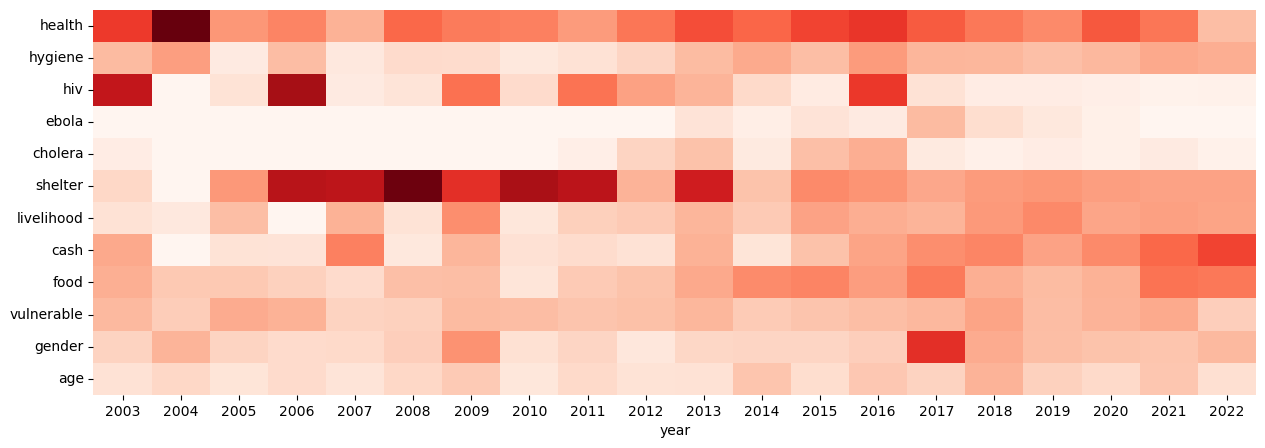

In [168]:
#tokens = df.iloc[3]['tokens']
#print(tokens)
#
#count_keywords(tokens, keywords=keywords)
freq_df = count_keywords_by(df, by='year', keywords=keywords)

freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)

df_display = freq_df.head(20)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data=df_display.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

In [31]:
text = df.iloc[197405]['paragraph']
text

'All financial reports in relation to the Government budget including money used for  emergency relief are audited by the Chief Auditor and the Audit Office.181 Audited finan- cial accounts are then passed to Parliament where the reports are scrutinised by the  Select Committee of Parliament responsible for Finance and Expenditure before being  tabled in Parliament for its consideration and approval.182 The Government through  the MOF has in the past produced and published on the MOF website reports on the  allocation and utilisation of disaster related funds and assistance. This is noted as good  practice in terms of accountability and transparency to all stakeholders'

In [43]:
def tokenize(text):
    text = text.lower()
    doc = nlp(text)
    return [ w.lemma_ for w in doc if w.is_stop == False and w.is_space == False and w.is_punct == False]
    
tokenize(text)    

['financial',
 'report',
 'relation',
 'government',
 'budget',
 'include',
 'money',
 'emergency',
 'relief',
 'audit',
 'chief',
 'auditor',
 'audit',
 'office.181',
 'audit',
 'finan-',
 'cial',
 'account',
 'pass',
 'parliament',
 'report',
 'scrutinise',
 'select',
 'committee',
 'parliament',
 'responsible',
 'finance',
 'expenditure',
 'table',
 'parliament',
 'consideration',
 'approval.182',
 'government',
 'mof',
 'past',
 'produce',
 'publish',
 'mof',
 'website',
 'report',
 'allocation',
 'utilisation',
 'disaster',
 'relate',
 'fund',
 'assistance',
 'note',
 'good',
 'practice',
 'term',
 'accountability',
 'transparency',
 'stakeholder']

In [159]:
df_display = freq_df.head(20)
df_display

,hiv,shelter,livelihood,cash,food,health,community,hygiene,vulnerable,gender,age
year,,,,,,,,,,,
2003,0.084835,0.016673,0.012427,0.033346,0.031439,0.068745,0.069638,0.027227,0.027789,0.018433,0.012427
2004,0.000000,0.000000,0.008477,0.000000,0.022427,0.108885,0.077226,0.036949,0.020764,0.029364,0.016953
2005,0.012077,0.039032,0.026090,0.012077,0.022415,0.039239,0.059712,0.006973,0.032457,0.018004,0.010651
2006,0.094441,0.088361,0.000000,0.011643,0.019482,0.045689,0.070049,0.026549,0.030360,0.015620,0.015620
2007,0.007070,0.086361,0.030328,0.047111,0.015490,0.030492,0.061637,0.008366,0.018706,0.015810,0.011400
2008,0.011275,0.107190,0.011959,0.008914,0.025526,0.055238,0.085870,0.015439,0.019529,0.020327,0.016913
2009,0.052129,0.072587,0.042276,0.028934,0.026287,0.048907,0.079280,0.015030,0.027279,0.041000,0.021872
2010,0.015440,0.093527,0.009576,0.012847,0.010489,0.046910,0.086286,0.008565,0.026398,0.013542,0.009576
2011,0.051070,0.087600,0.019842,0.014984,0.022114,0.037980,0.088561,0.012401,0.023854,0.017538,0.015881


In [174]:
len(set(df.file.unique().tolist()))

400

In [175]:
df.to_pickle('ifrc_evals.pkl')